In [12]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')                  # do not show warnings
from __future__ import print_function
from scipy import interpolate, signal
from time import *
from obspy import *
from obspy.core import read, UTCDateTime
from obspy.clients.fdsn import Client
from obspy.signal.cross_correlation import xcorr_pick_correction
from obspy.signal.filter import lowpass
from matplotlib.mlab import detrend
from obspy.signal.invsim import cosine_taper
from wf_fft import wf_fft
from smooth import smooth
import numpy as np
import matplotlib.pylab as plt
import os
import glob
import wave
import struct
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['lines.linewidth'] = 1

# Adaptation of CAN_noise.m by Carl Tape
# Coding by: Yongki Aiman, Tomy Gunawan, Angel Ling
# Analyzing the noise time series at CAN

# wf_fft and smooth are homebrewed functions.
# They MUST be in your working directory

# Run this cell before the beginning of each session

In [3]:
# Getting the waveform

client = Client("IRIS")
t = UTCDateTime("2004-12-26T00:58:53.0")
starttime = t-(9*24*3600) # 10 days before the Sumatra earthquake
endtime = t # the original time of the Sumatra earthquake

st = client.get_waveforms("G", "CAN", "*", "LHZ", starttime, endtime, attach_response=True)
print(st)

1 Trace(s) in Stream:
G.CAN..LHZ | 2004-12-17T00:58:53.019200Z - 2004-12-26T00:58:52.019200Z | 1.0 Hz, 777600 samples


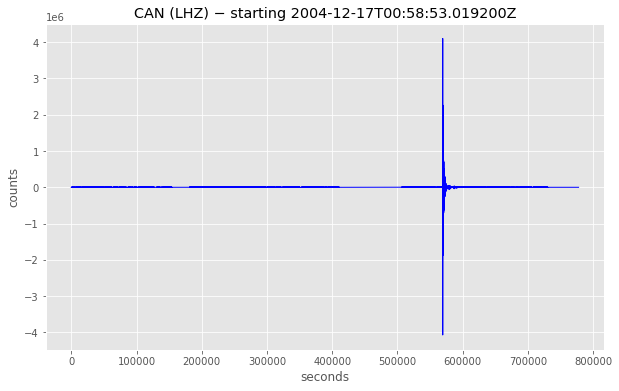

In [4]:
# Plotting signals
tr = st[0]
times = st[0].times()
trace_data = tr.data

title = 'CAN (LHZ) − starting '+ str(st[0].stats['starttime'])

plt.plot(times,tr.data,color='b')
plt.title(title)
plt.xlabel('seconds')
plt.ylabel('counts')
plt.show();

1 Trace(s) in Stream:
G.CAN..LHZ | 2004-12-17T00:58:53.019200Z - 2004-12-26T00:58:52.019200Z | 1.0 Hz, 777600 samples


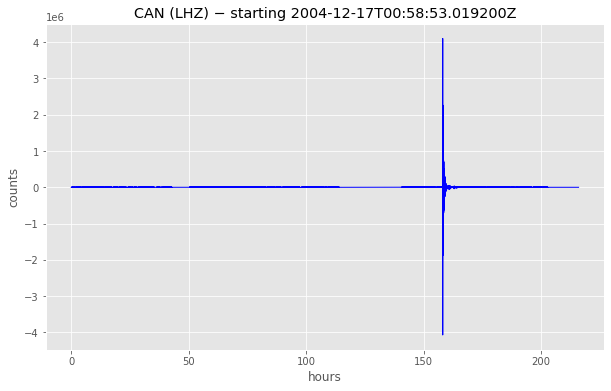

In [5]:
# Extract a subset time series
t1 = UTCDateTime("2004-12-26T00:58:53.0")
starttime1 = t-(9*24*3600) # Change this to a window with no visible earthquakes!
endtime1 = t # Change this to a window with no visible earthquakes!

st1 = client.get_waveforms("G", "CAN", "*", "LHZ", starttime1, endtime1, attach_response=True)
print(st1)

# Plotting signals
title = 'CAN (LHZ) − starting '+ str(st1[0].stats['starttime'])

plt.plot(st1[0].times()/3600,st1[0].data,color='b')
plt.title(title)
plt.xlabel('hours')
plt.ylabel('counts')

plt.show();

In [ ]:
# Spectral analysis and decovolution starts here

